In [15]:
from langgraph.graph import StateGraph, START, END
from langchain_groq import ChatGroq
from dotenv import load_dotenv
from typing import TypedDict

In [16]:
load_dotenv()

True

In [17]:
model=ChatGroq(model='llama-3.1-8b-instant')


In [18]:
# model_testing: 

model.invoke('what is india?').content

"India is a country located in South Asia, bordered by several countries including Pakistan, China, Nepal, Bhutan, Bangladesh, and Myanmar. It is the seventh-largest country in the world by area, with a diverse geography that includes the Himalayan mountains, the Indo-Gangetic Plain, and the Deccan Plateau.\n\nIndia is a federal republic with a parliamentary democracy, and its capital is New Delhi. The country has a population of over 1.4 billion people, making it the second-most populous country in the world after China. The official languages of India are Hindi and English, but there are 22 officially recognized languages and over 1,600 dialects spoken across the country.\n\nIndia has a rich cultural heritage, with a history dating back over 5,000 years. It is home to some of the world's most ancient civilizations, including the Indus Valley Civilization and the Vedic Civilization. The country has a significant impact on world culture, with contributions to fields such as philosophy 

In [19]:
# define state: 
class LLMState(TypedDict): 
    question: str
    answer: str

In [23]:
def llm_qa(state: LLMState)-> LLMState: 
    question=state['question']
    
    prompt=f"give the answer of this question : {question}"
    answer=model.invoke(prompt).content

    state['answer']=answer

    return state

In [24]:
# define graph
graph=StateGraph(LLMState)

# add nodes: 
graph.add_node('llm_qa', llm_qa)

# add edegs
graph.add_edge(START, 'llm_qa')
graph.add_edge('llm_qa', END)

# compile 
worflow=graph.compile()

In [ ]:
# execute: 

initial_state={'question': 'distance bw earth and moon'}

final_state=worflow.invoke(initial_state)
print(final_state['answer'])

The average distance from the Earth to the Moon is approximately 384,400 kilometers (238,900 miles). 

However, this distance is not constant due to the elliptical shape of the Moon's orbit around the Earth. The closest point, known as perigee, is approximately 363,300 kilometers (225,300 miles), and the farthest point, known as apogee, is approximately 405,500 kilometers (252,000 miles).


In [32]:
model.invoke('distance bw earth and moon').content

'The average distance between the Earth and the Moon is about 384,400 kilometers (238,900 miles). This distance is called the "lunar distance" or "lunar mean distance." However, the Moon\'s orbit is not a perfect circle and varies slightly over the course of a month due to the elliptical shape of its orbit.\n\nAt its closest point (called "perigee"), the Moon is about 363,300 kilometers (225,300 miles) away from the Earth.\n\nAt its farthest point (called "apogee"), the Moon is about 405,500 kilometers (252,000 miles) away from the Earth.\n\nSo, to summarize:\n\n- Average distance: 384,400 km (238,900 miles)\n- Perigee (closest point): 363,300 km (225,300 miles)\n- Apogee (farthest point): 405,500 km (252,000 miles)'

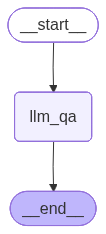

In [30]:
worflow